In [53]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


### Parameters
data_folder = 'data/'
skip_first = False
epochs = 10
batch_size = 64
use_lateral_images = False
flip_dataset = True
model_type = 'nvidia'
learning_rate = 1e-03
train_augmentation = 1 * (3 if use_lateral_images else 1)
mode = 'train'


### Import and split data log
samples = []
with open(data_folder + '/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    first = True
    for row in reader:
        if not first:
            samples.append(row)
        else:
            first = False

train_samples, validation_samples = train_test_split(samples, test_size=0.2)


samples = train_samples


num_samples = len(samples)
sklearn.utils.shuffle(samples)
       
images = []
angles = []

for sample in samples:

    # Read steering angle and compute adjusted steering measurements for the side camera images
    steering_center = float(sample[3])
    correction = 0.4
    steering_left = steering_center + correction
    steering_right = steering_center - correction

    # Read in images from center, left and right cameras. Images are loaded as BGR as default, I change the color space to YUV.
    path = data_folder + 'IMG/'
    img_center = cv2.cvtColor(cv2.imread(path + sample[0].split('/')[-1]), cv2.COLOR_BGR2YUV)
    img_left   = cv2.cvtColor(cv2.imread(path + sample[1].split('/')[-1]), cv2.COLOR_BGR2YUV)
    img_right  = cv2.cvtColor(cv2.imread(path + sample[2].split('/')[-1]), cv2.COLOR_BGR2YUV)

    # Add images and angles to dataset
    if use_lateral_images and (mode == 'train'):
        images_to_append = [img_center, img_left, img_right]
        angles_to_append = [steering_center, steering_left, steering_right]
    else:
        images_to_append = [img_center]
        angles_to_append = [steering_center]

    # Flip some images
    flipornot = bool(np.round(np.random.rand(1)))
    if flip_dataset and flipornot and (mode == 'train'):
        for image in images_to_append:
            image = cv2.flip(image, 1)
        for angle in angles_to_append:
            angle = -1. * angle

    # Append the results to the output list
    images.extend(images_to_append)
    angles.extend(angles_to_append)

# Convert to numpy array and return
X_train = np.array(images)
y_train = np.array(angles)


print(X_train.shape)

(13430, 160, 320, 3)


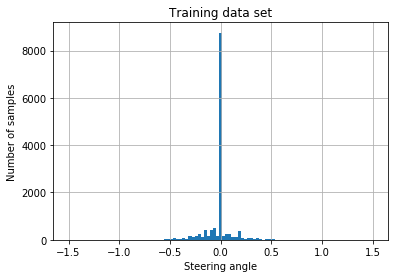

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

f, ax = plt.subplots()
bins = np.linspace(-1.5,+1.5,100)
ax.hist(y_train, bins=bins, log=False)

#title = 'Training and validation data sets'
title = 'Training data set'

ax.set_xlabel('Steering angle')
ax.set_ylabel('Number of samples')
#ax.set_ylabel('Number of samples (log)')
ax.set_title(title)
ax.grid(True)

plt.show()
figname = 'distr_train_no3.png'
f.savefig(figname, bbox_inches='tight')



In [56]:
print(np.where(y_train==0)[0].shape)

(8534,)
